## Netflix Data Exploration

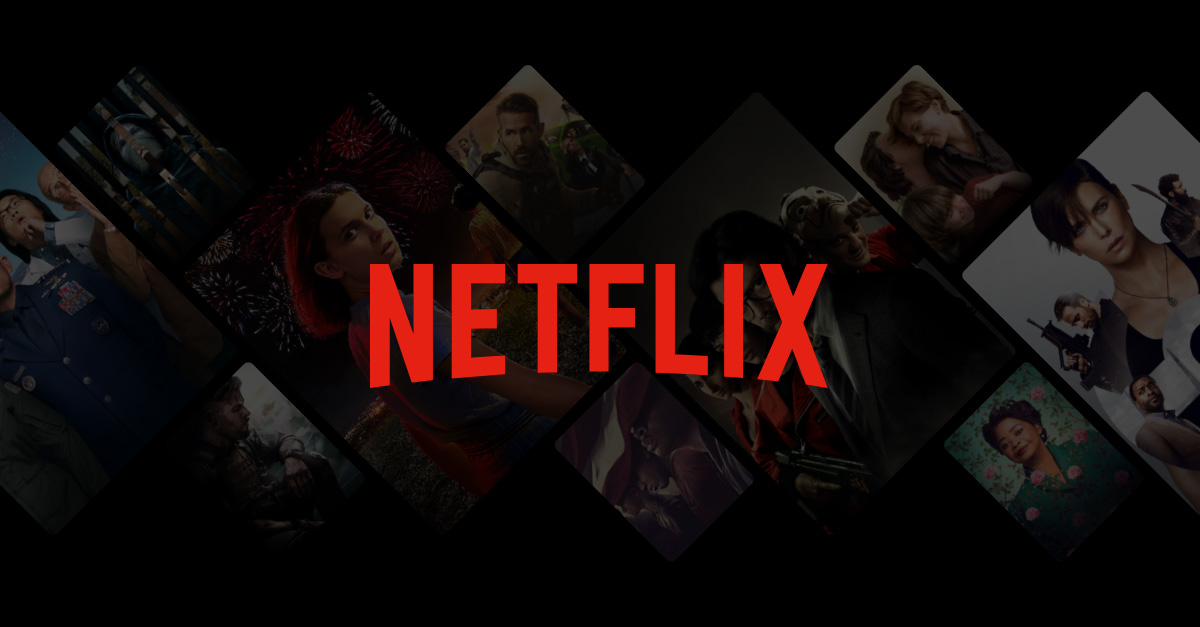

#### About

Netflix is a streaming platform that offers online access to a vast library of TV shows, movies, documentaries, and more. It was founded in 1997 as a DVD-by-mail service and has since evolved into one of the largest streaming platforms in the world. With Netflix, users can watch their favorite content anytime, anywhere, on a variety of devices including smart TVs, laptops, smartphones, and tablets.

In addition to offering a large selection of licensed content from major studios and networks, Netflix has also invested heavily in producing original content, such as the popular series "Stranger Things," "The Crown," and "Orange is the New Black." The company operates in over 190 countries and has millions of subscribers worldwide.

Overall, Netflix has revolutionized the way people watch TV and movies and has become an indispensable part of the entertainment landscape for millions of people around the world.

#### What are we trying to do?

Analyze the data and generate insights that could possibly help Netflix in deciding what type of shows/movies to produce and how they can grow the business in different countries.

#### What our analysis would help us understand

- The distribution of movies and TV shows
- The trend of show releases over the years.
- The distribution of shows based on countries.
- How show ratings are distributed
- The top directors or casts based on the number of shows.
- The most frequent words in show descriptions.
- Genre-wise trends in show releases over time.
- And many more...

#### Meta data

- Show_id: Unique ID for every Movie / Tv Show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie/show
- Country: Country where the movie/show was produced
- Date_added: Date it was added on Netflix
- Release_year: Actual Release year of the movie/show
- Rating: TV Rating of the movie/show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in: Genre
- Description: The summary description

#### Import libraries/Load data

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

import sqlite3

In [2]:
data = pd.read_csv("netflix_titles.csv")

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


From the information above we can see that there are columns with empty values, so we would begin to handle those.

#### Data Cleaning

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
data.isna().sum() # Empty rows

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

The missing values are in:

<b>director:</b> This will be needed in our analysis, even with so much missing values we would work with what is available.

<b>cast:</b> This will also be needed in our analysis, so no drops.

<b>country:</b> This is an important variable so we may fix it (using mode), however this may affect our anlysis so it may be best to leave it as is, since we aren't building any models.

<b>date_added:</b> There are just a few cases, so lets drop them.

<b>rating:</b> There are also a few cases, so lets drop them.

In [6]:
# Drop empty rows based on rating
data = data.dropna(subset=['rating'])

# Drop empty rows based on date_added
data = data.dropna(subset=['date_added'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 6222
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6214 non-null   int64 
 1   type          6214 non-null   object
 2   title         6214 non-null   object
 3   director      4259 non-null   object
 4   cast          5647 non-null   object
 5   country       5743 non-null   object
 6   date_added    6214 non-null   object
 7   release_year  6214 non-null   int64 
 8   rating        6214 non-null   object
 9   duration      6214 non-null   object
 10  listed_in     6214 non-null   object
 11  description   6214 non-null   object
dtypes: int64(2), object(10)
memory usage: 631.1+ KB


Show targets based on ratings

In [8]:
rating_names = {
    'TV-MA': 'Mature Audiences',
    'TV-14': 'Parents Strongly Cautioned (14+)',
    'TV-PG': 'Parental Guidance Suggested (PG)',
    'R': 'Restricted (17+)',
    'PG-13': 'Parents Strongly Cautioned (13+)',
    'NR': 'Not Rated',
    'PG': 'Parental Guidance Suggested (PG)',
    'TV-Y7': '7 and Older',
    'TV-G': 'General Audiences',
    'TV-Y': 'All Children',
    'TV-Y7-FV': '7 and Older (Fantasy Violence)',
    'G': 'General Audiences',
    'UR': 'Unrated',
    'NC-17': 'Adults Only (NC-17)'
}

In [9]:
data['rating_names'] = data['rating'].replace(rating_names)
data['rating_names'].unique()

array(['Parental Guidance Suggested (PG)', 'Mature Audiences',
       '7 and Older (Fantasy Violence)', '7 and Older',
       'Parents Strongly Cautioned (14+)', 'Restricted (17+)',
       'All Children', 'Not Rated', 'Parents Strongly Cautioned (13+)',
       'General Audiences', 'Unrated', 'Adults Only (NC-17)'],
      dtype=object)

Country cleanup

In [10]:
# Lets retrieve just the first country
data['main_country'] = data['country'].apply(lambda c: c.split(',')[0] if pd.notna(c) else c)
data['main_country'].value_counts()

United States         2293
India                  808
United Kingdom         482
Canada                 206
Japan                  182
                      ... 
Dominican Republic       1
Somalia                  1
Guatemala                1
Iran                     1
Cyprus                   1
Name: main_country, Length: 72, dtype: int64

In [11]:
# Convert date added from object to datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

In [12]:
data.dtypes

show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
rating_names            object
main_country            object
dtype: object

#### Export Data

In [13]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_names,main_country
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Parental Guidance Suggested (PG),United States
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Mature Audiences,United Kingdom
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",7 and Older (Fantasy Violence),United States
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,7 and Older,United States
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,Parents Strongly Cautioned (14+),United States


In [14]:
conn = sqlite3.connect('Data.db')

# Export the DataFrame to SQLite
data.to_sql('Netflix', conn, index=False, if_exists='replace')

6214

#### Data Visualization

In [14]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_names,main_country
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Parental Guidance Suggested (PG),United States
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Mature Audiences,United Kingdom
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",7 and Older (Fantasy Violence),United States
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,7 and Older,United States
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,Parents Strongly Cautioned (14+),United States


Distrubution of Movies and TV Shows

In [16]:
type_counts = data['type'].value_counts()

fig = px.pie(type_counts, values=type_counts.values, names=type_counts.index, title='Distribution of Show Types')
fig.show()

 Release Year Counts

In [17]:
# Group by year and type, and count the number of shows released
yearly_counts = data.groupby(['release_year', 'type']).size().reset_index(name='count')

# Create a line plot using Plotly Express
fig = px.line(yearly_counts, x='release_year', y='count', color='type',
              labels={'count': 'Number of Shows Released','release_year': 'Release Year'},
              title='Total Number of Shows Per Year with Type Encoding')

# Show the plot
fig.show()

In [18]:
country_counts = data['main_country'].value_counts().reset_index(name='count')

# Create a Choropleth map using Plotly Express
fig = px.choropleth(country_counts, locations='index', locationmode='country names',
                    color='count', hover_name='index', color_continuous_scale='Inferno',
                    title='Count of Shows by Country')

fig.show()

In [19]:
country_counts = data.groupby(['main_country', 'type']).size().reset_index(name='count')

# Create a choropleth map using Plotly Express
fig = px.choropleth(country_counts, 
                    locations='main_country', 
                    locationmode='country names',  # Use country names
                    color='main_country', 
                    hover_name='main_country',
                    animation_frame='type',  # Animation based on 'type'
                    color_continuous_scale='Viridis',
                    labels={'count': 'Count of Shows'},
                    title='Distribution of Shows Types by Country'
                    )

fig.show()

In [22]:
rating_counts = data.groupby(['rating_names', 'type']).size().reset_index(name='count')

# Create a bar chart using Plotly Express
fig = px.bar(rating_counts, x='rating_names', y='count', color='type',
             labels={'count': 'Count of Shows','rating_names': 'Rating Names'}, title='Rating Distribution of Shows',
             barmode='group')  # Use 'barmode' to group bars by 'type'

fig.show()

In [21]:
# we split the 'cast' column and create a new DataFrame first.
casts_df = data['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='cast')

# Group by cast and count by top 10
top_casts = casts_df['cast'].value_counts().reset_index(name='count').head(20)

# Create a bar chart using Plotly Express
fig = px.bar(top_casts, x='index', y='count',
             labels={'count': 'Number of Shows','index': 'Actors'}, title='Top 20 Casts Based on Number of Shows')

# Show the plot
fig.show()

In [22]:
# we split the 'director' column and create a new DataFrame first.
casts_df = data['director'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='director')

# Group by cast and count by top 10
top_casts = casts_df['director'].value_counts().reset_index(name='count').head(20)

# Create a bar chart using Plotly Express
fig = px.bar(top_casts, x='index', y='count',
             labels={'count': 'Number of Shows','index': 'Directors'}, title='Top 20 Directors Based on Number of Shows')

fig.show()

In [23]:
# Extract numeric values and units from the 'duration' column
data['duration_value'] = data['duration'].str.extract('(\d+)').astype(float)
#data['duration_unit'] = data['duration'].str.extract('(\D+)')

In [24]:
# create DataFrame for movies
movies_df = data[data['type'] == 'Movie']

# create box plot using Plotly Express
fig_movies = px.box(movies_df, y='duration_value', title='Distribution of Movie Durations',
                    labels={'duration_value': 'Duration (minutes)'})

fig_movies.show()

In [25]:
# create DataFrame for TV shows
tv_shows_df = data[data['type'] == 'TV Show']

fig_tv_shows = px.box(tv_shows_df, y='duration_value', title='Distribution of TV Show Durations',
                      labels={'duration_value': 'Number of Seasons'})

fig_tv_shows.show()

In [26]:
data.listed_in.value_counts()

Documentaries                                             299
Stand-Up Comedy                                           273
Dramas, International Movies                              248
Dramas, Independent Movies, International Movies          186
Comedies, Dramas, International Movies                    174
                                                         ... 
British TV Shows, Reality TV, Romantic TV Shows             1
Reality TV, Science & Nature TV, TV Action & Adventure      1
Classic Movies, Dramas, LGBTQ Movies                        1
Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy              1
Reality TV, Spanish-Language TV Shows                       1
Name: listed_in, Length: 461, dtype: int64

In [27]:
# Split the 'listed_in' column and create a new DataFrame
genres_df = data['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='genre')

# Group by genre and count occurrences
genre_counts = genres_df['genre'].value_counts().reset_index(name='count')

# Create a treemap chart using Plotly Express
fig = px.treemap(genre_counts, path=['index'], values='count', title='Distribution of Shows Based on Genres')

# Show the plot
fig.show()

In [28]:
# Split the 'genres' column and create a new DataFrame
genres_df = data['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).reset_index(name='genre')

# Merge the new DataFrame with the original one
df_merged = pd.merge(data, genres_df, left_index=True, right_index=True)

# Create a Treemap chart using Plotly Express
fig = px.treemap(df_merged, path=['type', 'genre'], title='Distribution of Shows Based on Genres')

# Show the plot
fig.show()

In [29]:
# Extract month and year from 'date_added' column
data['month_added'] = data['date_added'].dt.to_period('M')

# Group by month and count the number of shows added
monthly_counts = data['month_added'].value_counts().sort_index().reset_index()
monthly_counts['index'] = monthly_counts['index'].astype(str)

# Create a line chart using Plotly Express
fig = px.line(monthly_counts, x='index', y='month_added', labels={'month_added': 'Number of Shows Added', 'index':'Years'},
              title='Monthly Addition of Shows to Netflix Over Time')

fig.show()

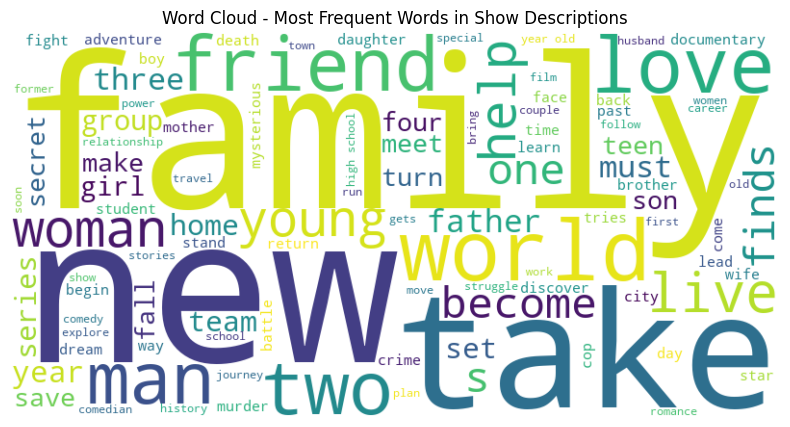

In [30]:
# Concatenate all descriptions into a single string
all_descriptions = ' '.join(data['description'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400,
                      stopwords=STOPWORDS.update({"find","life"}), max_words=100, background_color='white').generate(all_descriptions)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words in Show Descriptions')
plt.show()